In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [15]:
venues = ['icml', 'neurips']
keys = []
for i in venues:
    keys.extend([os.path.join(f'../{i}',j) for j in os.listdir(f'../{i}')])
keys = np.array(keys)

In [48]:
years = [2020, 2021, 2022, 2023, 2024]
applications = {}
for i in years:
    csv_files = keys[[int(k.split('_')[-1].split('.')[0]) == i for k in keys]]
    for j in csv_files:
        data = pd.read_csv(j,dtype=str)
        appl, count = np.unique(np.array(data['Application']), return_counts=True)
        for k in range(len(appl)):
            if appl[k] not in applications.keys():
                applications[appl[k]] = np.zeros(len(years))
            applications[appl[k]][i-2020] = count[k]   
applications = pd.DataFrame(applications, index=years)
include_applications = applications[applications.columns[applications.sum() > 10]]

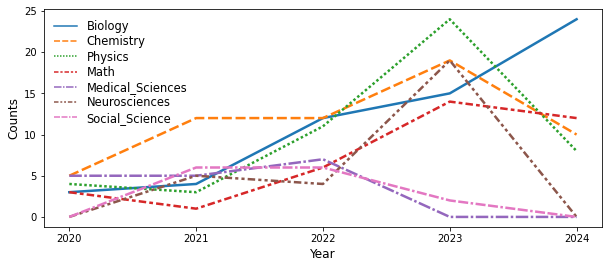

In [63]:
figure = plt.figure(figsize=(10, 4))
sns.lineplot(data=include_applications, palette="tab10", linewidth=2.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(years, years)
plt.legend(labelspacing = 0.2,frameon=False, fontsize=11.5)
plt.savefig('conference_application_year.png', dpi=200, bbox_inches='tight')
plt.show()